# Applied and Practical Data science
## Team name - WSU Final

### Apoorva Palle (Z248H929) , Areeba Mohiuddin (D655Y483) , Sri Manikanta Reddy Tangirala (G332B644) , Lakshmi Vasanthi Godi (V567R326)

## Importing all the required libraryes

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\Aneesh Reddy\\OneDrive\\Desktop\\appu ads EDA\\GSS2018_values.csv")

AGE = df['AGE']
RELIG = df['RELIG']
CLASS = df['CLASS']
PARTYID = df['PARTYID']
SEXNOW = df['SEXNOW']
DIPGED = df['DIPGED']
CONRINC = df['CONRINC']
POLVIEWS = df['POLVIEWS']
SATFAM7 = df['SATFAM7']
PRES16 = df['PRES16']
X = pd.DataFrame({
    'AGE': AGE,
    'RELIG': RELIG,
    'CLASS': CLASS,
    'PARTYID': PARTYID,
    'SEXNOW': SEXNOW,
    'DIPGED': DIPGED,
    'CONRINC': CONRINC,
    'POLVIEWS': POLVIEWS,
    'SATFAM7': SATFAM7
})
y = PRES16

### Displayed the total number of NULL values in the data set

In [12]:
a = df.isna().sum()
print("Total number of Null vales in data set :\n ",a)

Total number of Null vales in data set :
  ABANY       0
ABDEFECT    0
ABFELEGL    0
ABHELP1     0
ABHELP2     0
           ..
YEARSJOB    0
YEARSUSA    0
YEARVAL     0
YOUSUP      0
ZODIAC      0
Length: 1065, dtype: int64


### Displayed the total number of duplicate values in the data set

In [11]:
b = df.duplicated().sum()
print("Total number of duplicate vales in data set : ",b)

Total number of duplicate vales in data set :  0


In [13]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['PRES16']
top_10_correlations = correlation_with_target.drop('PRES16').nlargest(10)
print(top_10_correlations)

PRES12       0.555662
PARTYID      0.239217
OTHER        0.185116
Jew          0.166840
AGE          0.162831
ROWNGUN      0.157964
RELIG        0.152613
OTH16        0.150806
CLASS        0.141861
SEI10EDUC    0.140594
Name: PRES16, dtype: float64


### Printing the Dependend and Independent variables 

In [90]:
print("Dependent Variable ""y"": ""PRES16""\n",y.head(3))
print("Independent Variables ""X"" : \n",X.head(3))

Dependent Variable y: PRES16
 0    2
1    2
2    2
Name: PRES16, dtype: int64
Independent Variables X : 
    AGE  RELIG  CLASS  PARTYID  SEXNOW  DIPGED  CONRINC  POLVIEWS  SATFAM7
0   43     11      2        5       0       1      0.0         6        3
1   74      2      2        2       1       2      0.0         8        0
2   42      4      3        4       2       1  70100.0         5        3


### Creating a table for Independent Variables and Dependent Variable

In [102]:
data = {'Dependent Variable': ['PRES16'],
        'Independent Variables': ['AGE' , 'RELIG' ,'CLASS','PARTYID','SEXNOW','DIPGED','CONRINC','POLVIEWS','SATFAM7']}
max_l = max(len(val) for val in data.values())
for key, val in data.items():
    if len(val) < max_length:
        data[key].extend(['None'] * (max_length - len(val)))
df2 = pd.DataFrame(data)
print(df2)

  Dependent Variable Independent Variables
0             PRES16                   AGE
1               None                 RELIG
2               None                 CLASS
3               None               PARTYID
4               None                SEXNOW
5               None                DIPGED
6               None               CONRINC
7               None              POLVIEWS
8               None               SATFAM7


## Data Visualization

###  Bar plot for Dependent Variable PRES16

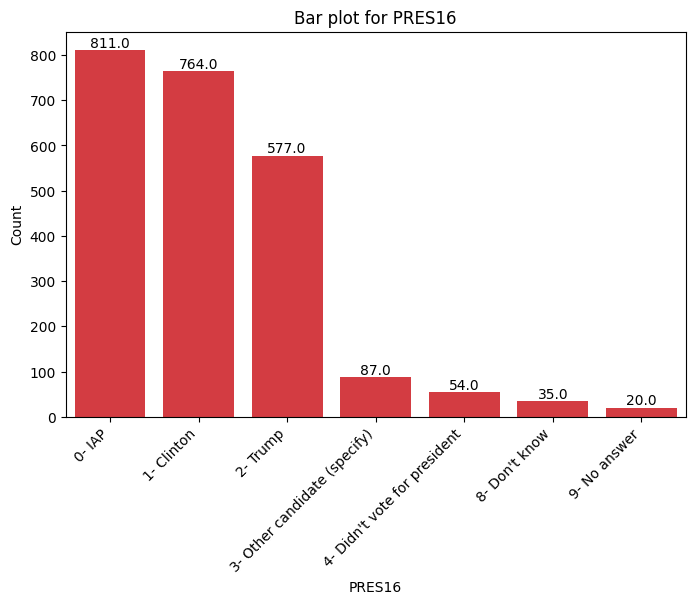

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PRES16', order=df['PRES16'].value_counts().index, color='#EC232B')
plt.title('Bar plot for PRES16')
plt.xlabel('PRES16')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
x_labels = ['0- IAP', '1- Clinton', '2- Trump', '3- Other candidate (specify)', "4- Didn't vote for president", "8- Don't know", '9- No answer']
x_ticks = range(len(x_labels))
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels, rotation = 45, ha= 'right')
plt.show()

### Bar plot for Independent Variable RELIG

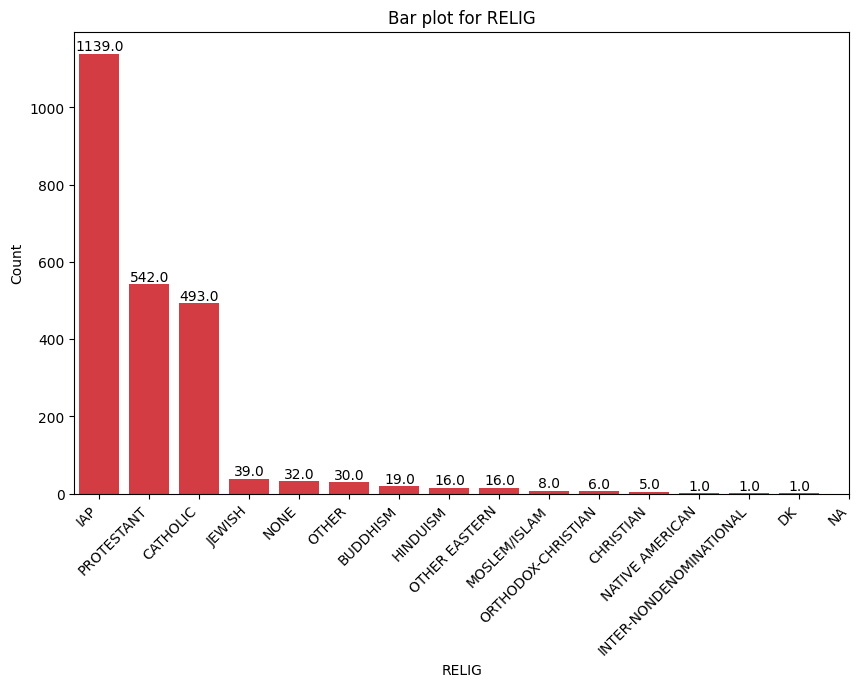

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RELIG', order=df['RELIG'].value_counts().index, color='#EC232B')
plt.title('Bar plot for RELIG')
plt.xlabel('RELIG')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
x_labels = ['IAP', 'PROTESTANT', 'CATHOLIC', 'JEWISH', 'NONE', 'OTHER', 'BUDDHISM', 'HINDUISM', 'OTHER EASTERN', 'MOSLEM/ISLAM', 'ORTHODOX-CHRISTIAN', 'CHRISTIAN', 'NATIVE AMERICAN', 'INTER-NONDENOMINATIONAL', 'DK', 'NA']
x_ticks = range(len(x_labels))
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels, rotation=45, ha='right')

plt.show()

### Bar plot for Variable PRES12

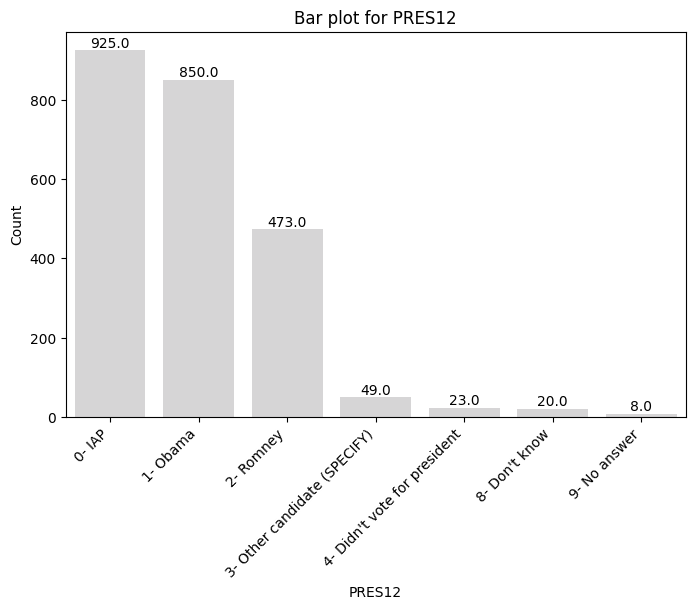

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PRES12', order=df['PRES12'].value_counts().index, color= '#D6D5D6')
plt.title('Bar plot for PRES12')
plt.xlabel('PRES12')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
x_labels = ['0- IAP', '1- Obama', '2- Romney', '3- Other candidate (SPECIFY)', "4- Didn't vote for president", "8- Don't know", '9- No answer']
x_ticks = range(len(x_labels))
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels, rotation=45, ha='right')

plt.show()

### Bar plot for Independent Variable AGE

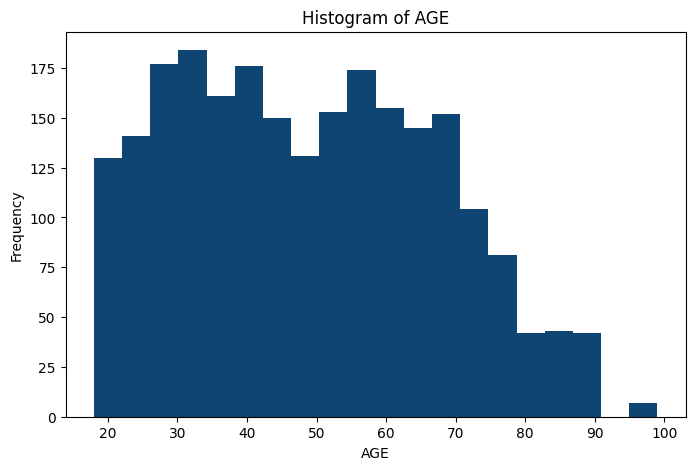

In [47]:
plt.figure(figsize=(8,5))
plt.hist(df['AGE'], bins=20, color='#0E4572')
plt.title('Histogram of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

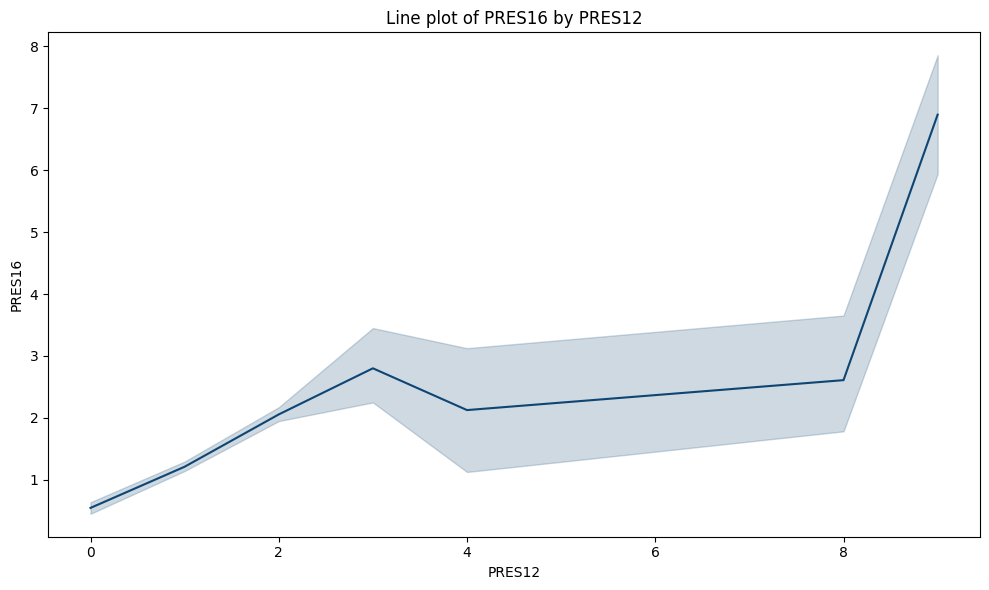

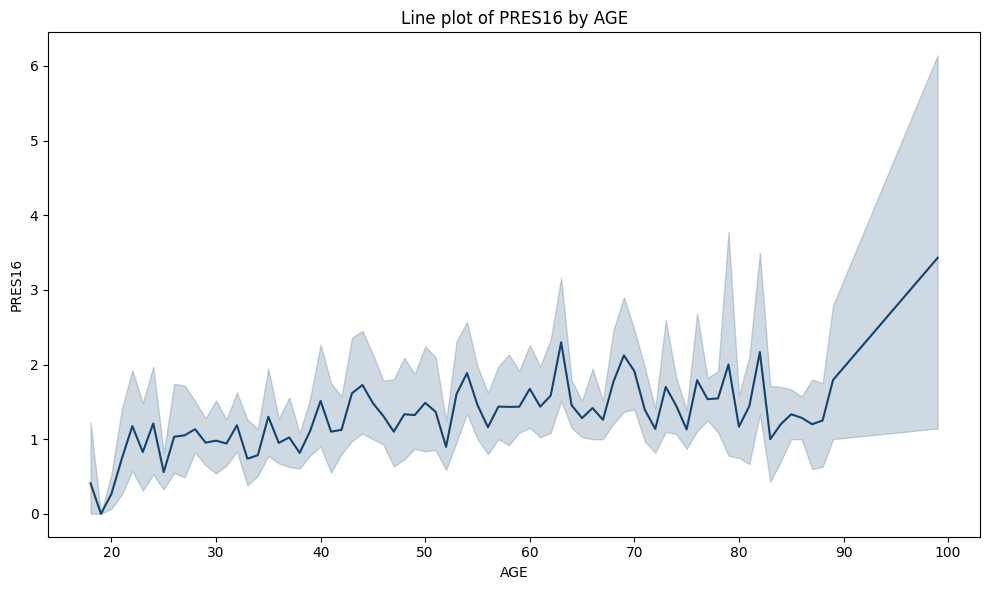

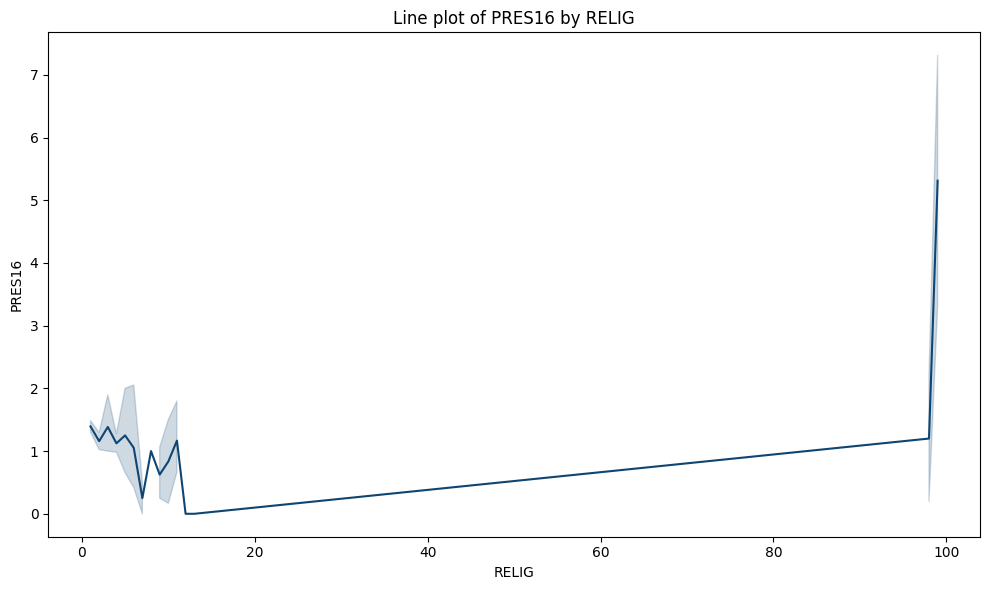

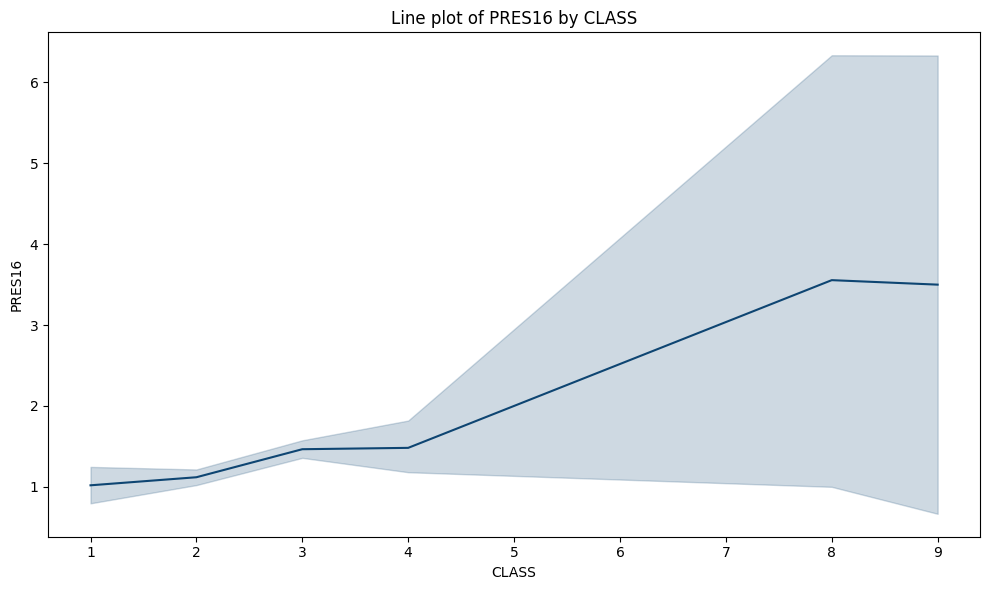

In [48]:
dependent_variable = 'PRES16'
independent_variables = ['PRES12', 'AGE', 'RELIG' ,'CLASS']
for independent_var in independent_variables:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=independent_var, y=dependent_variable, data=df, color='#0E4572')
    plt.title('Line plot of {} by {}'.format(dependent_variable, independent_var))
    plt.xlabel(independent_var)
    plt.ylabel(dependent_variable)
    plt.tight_layout()
    plt.show()

### Splitting the data into testing and training data sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model Selection 

## Linear Regression model

In [51]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
L_pred = linear_model.predict(X_test)

### calculating R-squared score and mean square error for the Linear Regression model

In [62]:
r2_L = r2_score(y_test, L_pred)
print("Linear Regression R-squared score is " , r2_L)
linear_MSE = mean_squared_error(y_test, L_pred)
print("Mean square error of Linear regression model is " , linear_MSE)

Linear Regression R-squared score is  0.13071595315217222
Mean square error of Linear regression model is  2.1583901817622633


## Decision Tree Regression model

In [53]:
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train, y_train)
D_pred = decisionTree_model.predict(X_test)

### calculating R-squared score and mean square error for the Decision Tree Regression

In [54]:
r2 = r2_score(y_test, D_pred)
print("decisionTree_model R-squared score is " , r2)
decision_MSE = mean_squared_error(y_test, D_pred)
print("Mean square error of Linear regression model is " , decision_MSE)

decisionTree_model R-squared score is  -1.1774017108976742
Mean square error of Linear regression model is  5.406382978723404


## Random Forest regression model

In [55]:
randomforest_model = RandomForestRegressor(random_state=42)
randomforest_model.fit(X_train, y_train)
R_pred = randomforest_model.predict(X_test)

### calculating R-squared score and mean square error for the Decision Tree Regression

In [56]:
r2 = r2_score(y_test, R_pred)
print("randomforest_model R-squared score is " , r2)
Random_MSE = mean_squared_error(y_test, R_pred)
print("Mean square error of Linear regression model is " , Random_MSE)

randomforest_model R-squared score is  0.08858514560133013
Mean square error of Linear regression model is  2.262998936170213


### By calculating the R-squared score and mean square error we can say that the Linear Regression model is the best fit for our data set as we can see that the R-squared score is high when compared to other regression models, where as mean square error is less.

### Visualization Showing and Comparing Mean Squared Errors and R-squared score of the models

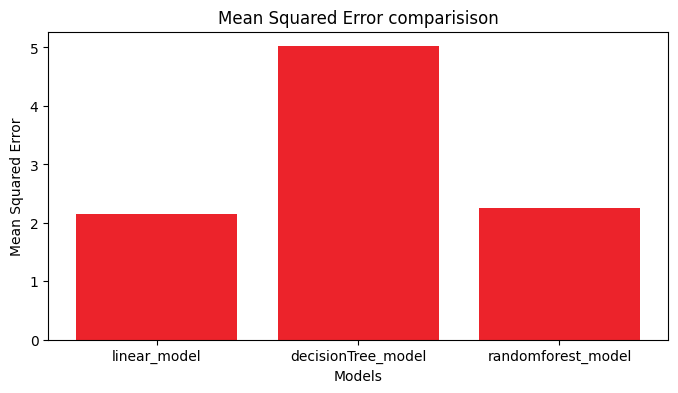

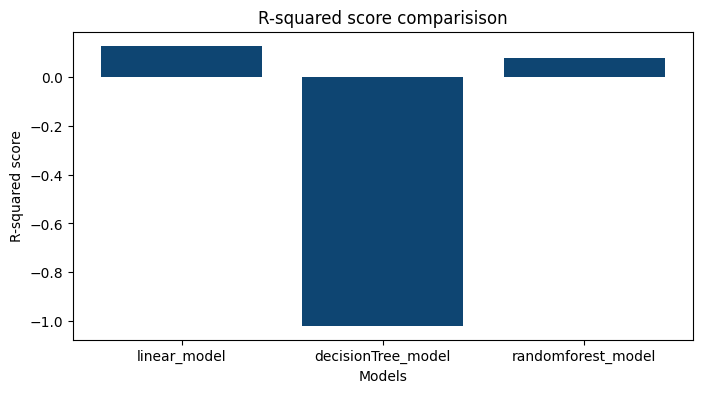

In [59]:
models = ['linear_model','decisionTree_model', 'randomforest_model']
mse_values = [2.15,5.02,2.26]  
r2_values = [0.13,-1.02,0.08]

# Plotting the MSE values
plt.figure(figsize=(8 , 4))
plt.bar(models, mse_values, color='#EC232B')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error comparisison')
plt.show()

# Plotting the R-squared score
plt.figure(figsize=(8, 4))
plt.bar(models, r2_values, color='#0E4572')
plt.xlabel('Models')
plt.ylabel('R-squared score')
plt.title('R-squared score comparisison')
plt.show()


### Mean Squared Error (MSE), or R-squared of Linear Regression model 
### In a linear regression model, accuracy can't typically be used as a metric because the predicted values are continuous. Instead, metrics such as Mean Squared Error (MSE), or R-squared are used in our project to evaluate the performance of a model.

In [63]:
print("Linear Regression R-squared score is " , r2_L)
print("Mean square error of Linear regression model is " , linear_MSE)

Linear Regression R-squared score is  0.13071595315217222
Mean square error of Linear regression model is  2.1583901817622633
